In [ ]:
import pandas as pd
from collections import Counter
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib

In [ ]:
df = pd.read_csv('/Monday-WorkingHours.pcap_ISCX.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529918 entries, 0 to 529917
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             529918 non-null  int64  
 1    Flow Duration                529918 non-null  int64  
 2    Total Fwd Packets            529918 non-null  int64  
 3    Total Backward Packets       529918 non-null  int64  
 4   Total Length of Fwd Packets   529918 non-null  int64  
 5    Total Length of Bwd Packets  529918 non-null  int64  
 6    Fwd Packet Length Max        529918 non-null  int64  
 7    Fwd Packet Length Min        529918 non-null  int64  
 8    Fwd Packet Length Mean       529918 non-null  float64
 9    Fwd Packet Length Std        529918 non-null  float64
 10  Bwd Packet Length Max         529918 non-null  int64  
 11   Bwd Packet Length Min        529918 non-null  int64  
 12   Bwd Packet Length Mean       529918 non-nul

In [ ]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,529918.000000,5.299180e+05,529918.000000,529918.000000,5.299180e+05,5.299180e+05,529918.000000,529918.000000,529918.000000,529918.000000,...,529918.000000,5.299180e+05,5.299180e+05,5.299180e+05,5.299180e+05,5.299180e+05,5.299180e+05,5.299180e+05,5.299180e+05,5.299180e+05
mean,10644.367112,1.038927e+07,10.390315,11.517105,5.324195e+02,1.789841e+04,190.897188,20.277279,50.744078,57.452269,...,7.412509,-3.614576e+03,6.843482e+04,4.321930e+04,1.453907e+05,4.380369e+04,3.463918e+06,2.024408e+05,3.620657e+06,3.274066e+06
std,21390.213475,2.875195e+07,892.412791,1173.318788,6.228642e+03,2.675470e+06,448.833754,36.275793,91.964713,146.518081,...,851.762351,5.526328e+05,5.872322e+05,3.971455e+05,1.028606e+06,4.993677e+05,1.297057e+07,2.170149e+06,1.340649e+07,1.273216e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.388531e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.760000e+02,2.000000,1.000000,1.800000e+01,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,3.130300e+04,2.000000,2.000000,6.800000e+01,1.440000e+02,40.000000,6.000000,38.000000,0.000000,...,1.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,3.557448e+05,4.000000,3.000000,1.870000e+02,3.920000e+02,83.000000,40.000000,53.000000,26.162951,...,3.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65535.000000,1.200000e+08,219759.000000,291922.000000,1.323378e+06,6.554530e+08,23360.000000,2293.000000,4638.923469,7125.596846,...,213557.000000,1.260000e+02,1.016597e+08,6.434950e+07,1.016597e+08,1.016597e+08,1.199997e+08,7.514502e+07,1.199997e+08,1.199997e+08


In [ ]:
features = [' Destination Port',' Flow Duration',' Total Fwd Packets',' Total Backward Packets','Total Length of Fwd Packets',' Total Length of Bwd Packets',' Packet Length Mean']
df = df[features]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529918 entries, 0 to 529917
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             529918 non-null  int64  
 1    Flow Duration                529918 non-null  int64  
 2    Total Fwd Packets            529918 non-null  int64  
 3    Total Backward Packets       529918 non-null  int64  
 4   Total Length of Fwd Packets   529918 non-null  int64  
 5    Total Length of Bwd Packets  529918 non-null  int64  
 6    Packet Length Mean           529918 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 28.3 MB


In [ ]:
freq = Counter(df[' Destination Port'])
seen = set()
for v in freq.keys():
  if freq[v] > 5000:
    seen.add(v)
print(seen)

{80, 53, 123, 443}


### Encoding ports
| Category            | Ports                          | Encoded Value |
| ------------------- | ------------------------------ | ------------- |
| **Web**             | 80, 443                        | 1             |
| **DNS**             | 53                             | 2             |
| **Well-known**      | 0–1023 (excluding above)       | 3             |
| **Registered**      | 1024–49151                     | 4             |
| **Dynamic/Private** | 49152–65535                    | 5             |
| **Unseen/rare**     | Other (e.g., during inference) | 6             |


### Risky ports
| Port                         | Usage / Risk                                                   |
| ---------------------------- | -------------------------------------------------------------- |
| **4444**                     | Metasploit default reverse shell                               |
| **5554**                     | Sasser worm                                                    |
| **6666–6669**                | IRC (often used by botnets)                                    |
| **31337**                    | Back Orifice (remote access Trojan), also "leet" port          |
| **12345**, **54321**         | NetBus Trojan                                                  |
| **135**, **139**, **445**    | Windows services — targeted by worms (e.g., EternalBlue)       |
| **8080**, **8888**, **9000** | Alternate web server ports (used in proxy abuse, malware C2)   |
| **17**, **19**               | Chargen / Quote of the Day — abused in reflection DDoS attacks |


In [ ]:
web = [80,443]
dns = [53]
risky = set([4444, 5554, 6666, 6667, 6668, 6669, 31337, 12345, 54321, 135, 139, 445, 8080, 8888, 9000, 17, 19])
for p in range(49152,65536):
  risky.add(p)
well_known = set(v for v in range(1024) if v not in risky)
registered = set(v for v in range(1024,49152) if v not in risky)

def encode_port(port):
  if port in web:
    return 1
  elif port in dns:
    return 2
  elif port in well_known:
    return 3
  elif port in registered:
    return 4
  elif port in risky:
    return 5


df[' Destination Port'] = df[' Destination Port'].apply(encode_port)

In [ ]:
df[' Destination Port'].value_counts()

,count
Destination Port,
2,214674
1,191786
5,86618
4,23250
3,13590


Using log scaling and minmax scaler

In [ ]:
df[' Flow Duration'] = np.log1p(df[' Flow Duration'])
scaler = MinMaxScaler()
df[' Flow Duration'] = scaler.fit_transform(df[[' Flow Duration']])
df[' Flow Duration'].value_counts()
joblib.dump(scaler, 'duration_scaler.pkl')

['duration_scaler.pkl']

TOTAL FWD PACKETS

<Axes: xlabel=' Total Fwd Packets', ylabel='Count'>

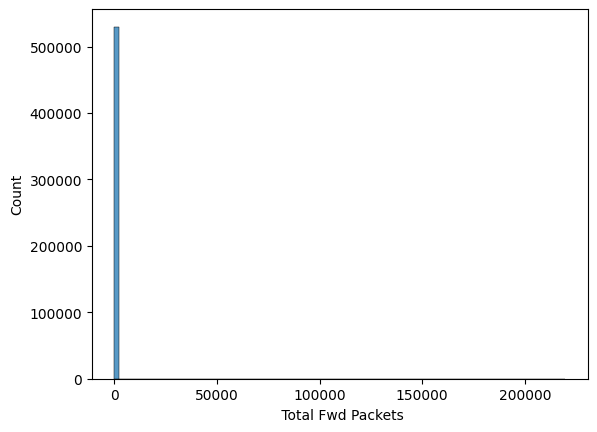

In [ ]:
import seaborn as sns
sns.histplot(df[' Total Fwd Packets'], bins=100)

In [ ]:
freq = Counter(df[' Total Fwd Packets'])
seen = set()
for v in freq.keys():
  if freq[v] > 10000:
    seen.add(v)
print(seen)

{1, 2, 3, 4, 5, 10}


In [ ]:
df[' Total Fwd Packets'] = np.log1p(df[' Total Fwd Packets'])
scaler = MinMaxScaler()
df[' Total Fwd Packets'] = scaler.fit_transform(df[[' Total Fwd Packets']])
joblib.dump(scaler, 'fwd_packets_scaler.pkl')

['fwd_packets_scaler.pkl']

Total BCKD PACKETS

<Axes: xlabel=' Total Backward Packets', ylabel='Count'>

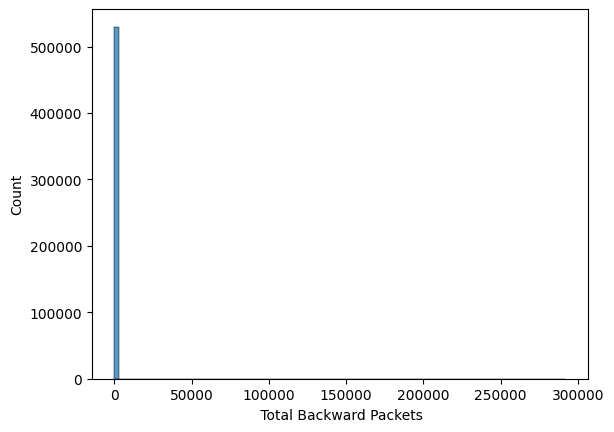

In [ ]:
import seaborn as sns
sns.histplot(df[' Total Backward Packets'], bins=100)

In [ ]:
df[' Total Backward Packets'] = np.log1p(df[' Total Backward Packets'])
scaler = MinMaxScaler()
df[' Total Backward Packets'] = scaler.fit_transform(df[[' Total Backward Packets']])
joblib.dump(scaler, 'bcd_packets_scaler.pkl')

['bcd_packets_scaler.pkl']

TOTAL LENGTH OF FWD PACKETS

<Axes: xlabel='Total Length of Fwd Packets', ylabel='Count'>

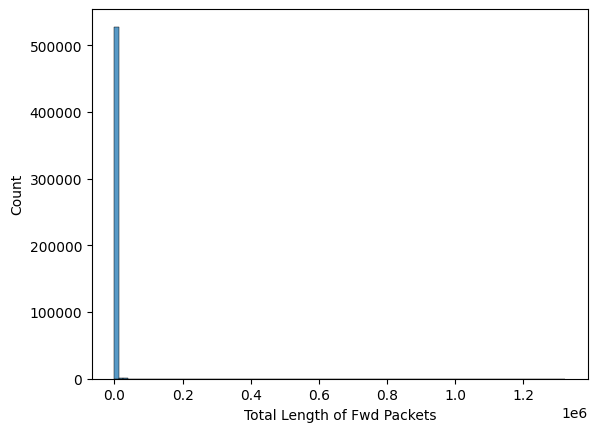

In [ ]:
import seaborn as sns
sns.histplot(df['Total Length of Fwd Packets'], bins=100)

In [ ]:
df['Total Length of Fwd Packets'] = np.log1p(df['Total Length of Fwd Packets'])


scaler = MinMaxScaler()
df['Total Length of Fwd Packets'] = scaler.fit_transform(df[['Total Length of Fwd Packets']])


joblib.dump(scaler, 'fwd_len_log_minmax_scaler.pkl')

['fwd_len_log_minmax_scaler.pkl']

TOTAL BCKD PACKETS LENGTH

<Axes: xlabel=' Total Length of Bwd Packets', ylabel='Count'>

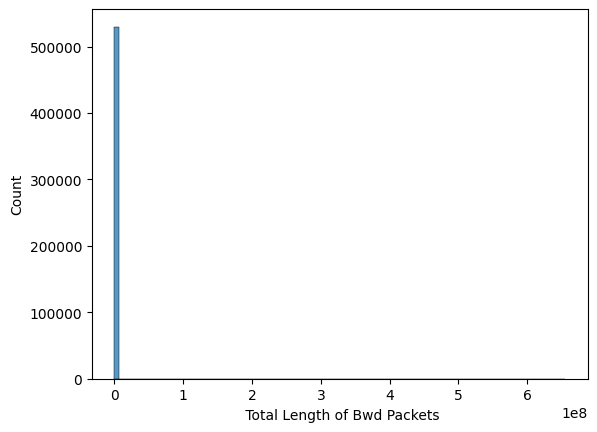

In [ ]:
import seaborn as sns
sns.histplot(df[' Total Length of Bwd Packets'], bins=100)

In [ ]:
df[' Total Length of Bwd Packets'] = np.log1p(df[' Total Length of Bwd Packets'])


scaler = MinMaxScaler()
df[' Total Length of Bwd Packets'] = scaler.fit_transform(df[[' Total Length of Bwd Packets']])


joblib.dump(scaler, 'bckd_len_log_minmax_scaler.pkl')

['bckd_len_log_minmax_scaler.pkl']

### Packet Length Mean

<Axes: xlabel=' Packet Length Mean', ylabel='Count'>

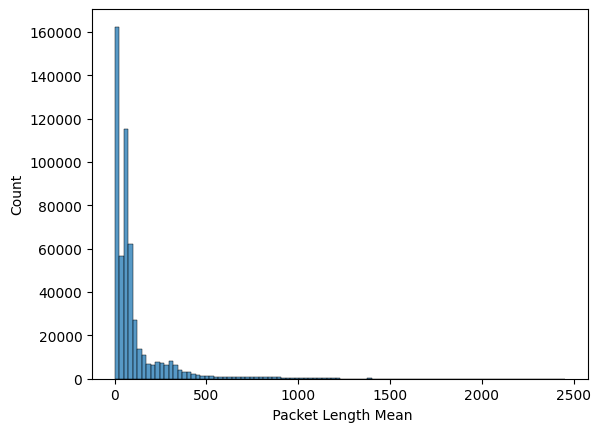

In [ ]:
import seaborn as sns
sns.histplot(df[' Packet Length Mean'], bins=100)

In [ ]:
df[' Packet Length Mean'] = np.log1p(df[' Packet Length Mean'])
scaler = MinMaxScaler()
df[[' Packet Length Mean']] = scaler.fit_transform(df[[' Packet Length Mean']])
joblib.dump(scaler, 'packet_len_log_minmax_scaler.pkl')

['packet_len_log_minmax_scaler.pkl']

<Axes: xlabel=' Packet Length Mean', ylabel='Count'>

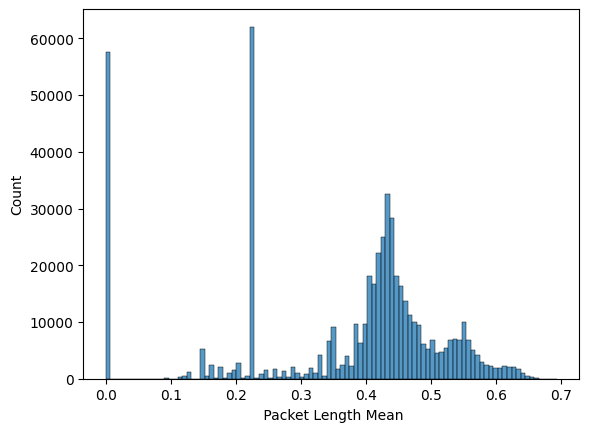

In [ ]:
sns.histplot(np.log1p(df[' Packet Length Mean']), bins=100)

In [ ]:
df.to_csv('processed_data.csv', index=False)